**BRIGHT BENARD**

**2100702287**  


 **Named Entity Recognition (NER)** 

 **Import necessary libraries**

In [1]:
! pip install ipywidgets
! jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 21.0 MB/s 
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")
import io

import tensorflow as tf
from tensorflow import keras
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.8.2
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**Mount Google drive**

In [3]:
# mounting the drive dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Upload dataset**

In [6]:
from pprint import pprint
import matplotlib.pyplot as plt

In [4]:
#Upload file from local drive
from google.colab import files
uploaded = files.upload()

Saving ner_dataset.csv to ner_dataset.csv


In [35]:
#Store dataset in Pandas Dataframe
# df2 = pd.read_csv(io.BytesIO(uploaded['ner_dataset.csv']))
# df2 = pd.read_csv(io.BytesIO(uploaded['Comments.csv']))

**encode uploaded data**

In [11]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")
# data = pd.read_csv("Comments.csv", encoding="latin1")
data = data.fillna(method="ffill")
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [12]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [13]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)

In [14]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [15]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)

**Retrieve Sentences and Corresponsing Tags**

In [16]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [17]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

**Define Mappings between Sentences and Tags**

In [18]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [19]:
word2idx

{'mortally': 1,
 'Bellinger': 2,
 'Figaro': 3,
 '210': 4,
 'Kareem': 5,
 'Navarro': 6,
 'reunions': 7,
 'ringleader': 8,
 'Xinqian': 9,
 'Livni': 10,
 'Ndjabu': 11,
 'politicians': 12,
 'optician': 13,
 'Senegal-based': 14,
 'skipped': 15,
 'coastlines': 16,
 'perestroika': 17,
 'by': 18,
 'brings': 19,
 'Jabel': 20,
 '428': 21,
 'coping': 22,
 'camaraderie': 23,
 'flashpoint': 24,
 'vapor': 25,
 'injury': 26,
 'member-states': 27,
 '50.9': 28,
 'beverages': 29,
 'psychic': 30,
 'interstate': 31,
 'fulfill': 32,
 'designated': 33,
 'Michalak': 34,
 'busy': 35,
 'breakup': 36,
 'Guadalupe': 37,
 'Wat': 38,
 'non-partisan': 39,
 'Esenler': 40,
 'BJP': 41,
 'dismissed': 42,
 'imposing': 43,
 'Otto': 44,
 'catastrophe': 45,
 'X-Ray': 46,
 'Hong': 47,
 'preventive': 48,
 '0.5': 49,
 'ChevronTexaco': 50,
 'Salahaddin': 51,
 'cabbage': 52,
 'derivative': 53,
 'Twitter': 54,
 'Daniel': 55,
 'comeback': 56,
 '1964': 57,
 'killers': 58,
 'Yosef': 59,
 'am': 60,
 'eggs': 61,
 'Morocco': 62,
 'hea

 **Padding Input Sentences and Creating Train/Test Splits**

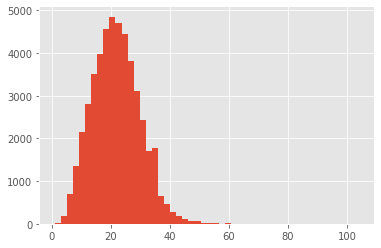

In [20]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Build and Compile a Bidirectional LSTM Model**

In [23]:
from tensorflow.keras import *
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [24]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 17)           3417      
 ibuted)                                                         
                                                             

In [25]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Install livelossplot**

In [26]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 **Train the Model**

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

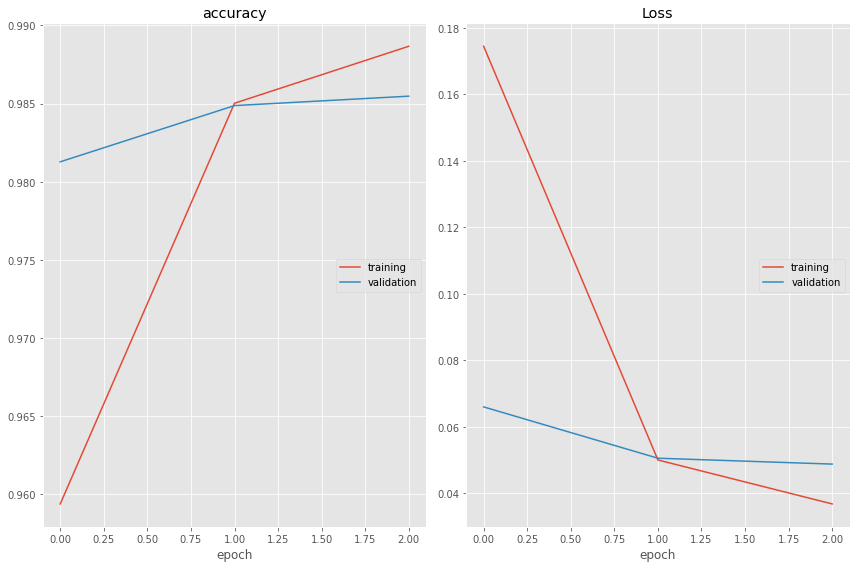

accuracy
	training         	 (min:    0.959, max:    0.989, cur:    0.989)
	validation       	 (min:    0.981, max:    0.985, cur:    0.985)
Loss
	training         	 (min:    0.037, max:    0.174, cur:    0.037)
	validation       	 (min:    0.049, max:    0.066, cur:    0.049)

Epoch 3: val_loss improved from 0.05054 to 0.04877, saving model to model_weights.h5
1199/1199 [==============================] - 404s 337ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0488 - val_accuracy: 0.9855
CPU times: user 30min 6s, sys: 3min 50s, total: 33min 56s
Wall time: 20min 51s


In [28]:
%%time

chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32, 
    epochs=3,
    callbacks=callbacks,
    verbose=1
)

 Epochs above indicate the number of passes of the entire training dataset the machine learning algorithm has completed.

 The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset

 Our model learns with a high level of accuracy and a small loss is incurred in the historical lessons learnt by this model

 **Evaluate Named Entity Recognition Model**

In [29]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 9s 29ms/step - loss: 0.0488 - accuracy: 0.9855


[0.048769257962703705, 0.9854754209518433]

In [30]:
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
The            O	O
United         B-geo	B-geo
States         I-geo	I-geo
has            O	O
103            O	O
nuclear        O	O
power          O	O
plants         O	O
in             O	O
31             O	B-tim
states         O	O
.              O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick       O	O
Kendrick 

# **Charting**
Create a Named Entity Recognition (NER) model that takes in a comment as an input and outputs the Entities, if any, belonging
to the categories: Person, Organization, Place/Location, Time


In [94]:
# import spacy
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [112]:
# The text has been taken from the Monitor newspaper about Elly Tumwines death
raw_text2 = "Hundreds of government dignitaries and thousands of locals attended the burial preceded by rain about 260kms from Ugandas capital. Chief mourner and President Museveni's representative at the funeral,Prime Minister Robinah Nabbanjah told mourners she would remember Gen Tumwine as a straightforward mentor of many government officials. He would never backbite anyone and he called an eye an eye she observed. President Museveni August 29 challenged Ugandans to emulate the resilient bush war hero whose first shot actualized a guerilla war that brought him into power in 1986. Young people should learn from that spirit of patriotism and sacrifice, Mr Museveni said of his 1979 revolutionary army recruit and ideologue until 2022. Aged 68, the ex-combatant and Uganda’s longest serving army representative in Parliament died from Lung cancer in neighboring Kenya on August 25, igniting public debate over his double-edged legacy."
text2= NER(raw_text2)

In [113]:
# print the data on the NEs found in this text
for word in text2.ents:
    print(word.text,word.label_)

Hundreds CARDINAL
thousands CARDINAL
about 260kms CARDINAL
Ugandas NORP
Museveni PERSON
Robinah Nabbanjah PERSON
Gen Tumwine PERSON
Museveni PERSON
August 29 DATE
Ugandans ORG
first ORDINAL
1986 DATE
Museveni PERSON
1979 DATE
2022 DATE
68 DATE
Uganda GPE
Parliament ORG
Lung PERSON
Kenya GPE
August 25 DATE


**Get more types of named entities. Let us identify what type they are**

In [114]:
spacy.explain("PERSON")

'People, including fictional'

In [115]:
spacy.explain("CARDINAL")

'Numerals that do not fall under another type'

In [116]:
spacy.explain("DATE")

'Absolute or relative dates or periods'

**Analyze the whole text in the form of a visual**

In [117]:
displacy.render(text2,style="ent",jupyter=True)

**NER of a News Article**

In [118]:
# NER of a News article
from bs4 import BeautifulSoup
import requests
import re

**URL for new article**

In [119]:
URL="https://www.zeebiz.com/markets/currency/news-cryptocurrency-news-today-june-12-bitcoin-dogecoin-shiba-inu-and-other-top-coins-prices-and-all-latest-updates-158490"

In [120]:
html_content = requests.get(URL).text

In [121]:
html_content = requests.get(URL).text

In [122]:
soup = BeautifulSoup(html_content, "lxml")

**Get the body content**

In [123]:
body=soup.body.text

We use regex to clean the text

In [124]:
body= body.replace('n', ' ')
body= body.replace('t', ' ')
body= body.replace('r', ' ')
body= body.replace('xa0', ' ')
body=re.sub(r'[^ws]', '', body)

In [125]:
body[1000:1500]

'sswsssswsssssssssssssswsswwwsswwswsswswsswswswsssswsssssswssssssswssssssssswswsswswswswswswswswswssssssssssssssssssssssswwsssssssssssswwswwsssssssssssssssssssssssssssssssswswssswsssssssssssssswswssswswsssswswsssssswswsssssswswsswswssswswsssswswsssssswswsssssswswsswsssswsssswssssssswssssssswsswsssswssssswssssssswssssssswssswsssswssssswssssssswssssssswssswssssswssssswsssssssswsssssssswssswssssssswssssswsssssssssswsssssssssswssswswswswswswswswwswwswswwswwwwswsswwswsswwwwwswwwswwwsswwwssswwwssswwwss'

In [130]:
'View in App    Bitcoin was down by 6 and was trading at Rs 2728815 after hitting days high of Rs 2900208 Source Reuters        Reported By ZeeBiz WebTeam Written By Ravi Kant Kumar      Updated Sat Jun 12 20210646 pm   Patna ZeeBiz WebDesk    RELATED NEWS            Cryptocurrency Latest News Today June 14 Bitcoin leads crypto rally up over 12 after ELON MUSK TWEET Check Ethereum Polka Dot Dogecoin Shiba Inu and other top coins INR price World India updates             Bitcoin law is only'

'View in App    Bitcoin was down by 6 and was trading at Rs 2728815 after hitting days high of Rs 2900208 Source Reuters        Reported By ZeeBiz WebTeam Written By Ravi Kant Kumar      Updated Sat Jun 12 20210646 pm   Patna ZeeBiz WebDesk    RELATED NEWS            Cryptocurrency Latest News Today June 14 Bitcoin leads crypto rally up over 12 after ELON MUSK TWEET Check Ethereum Polka Dot Dogecoin Shiba Inu and other top coins INR price World India updates             Bitcoin law is only'

**Proceed with Named Entity Recognition**

In [131]:
text3= NER(body)

In [132]:
displacy.render(text3,style="ent",jupyter=True)